In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy

In [13]:
# DATA

Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

month = np.arange(1,13)

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

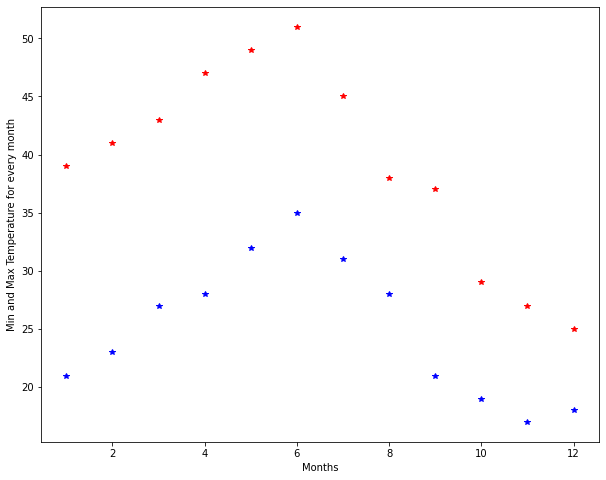

In [34]:
plt.figure(figsize=(10,8))
plt.plot(month,Max,'*',c='r')
plt.plot(month,Min,'*',c='b')
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature for every month');

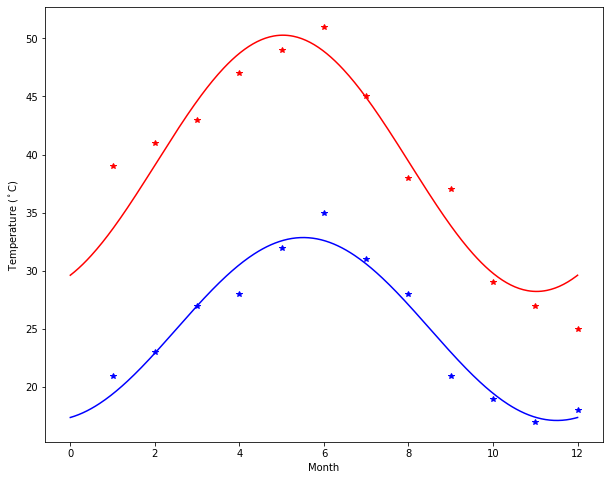

In [35]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month, Min, [-40, 20, 0])


days = np.linspace(0, 12, num=365)

plt.figure(figsize=(10,8))
plt.plot(month, Max, 'r*')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'b*')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Matplotlib

In [39]:
Data = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(Data)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

In [40]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

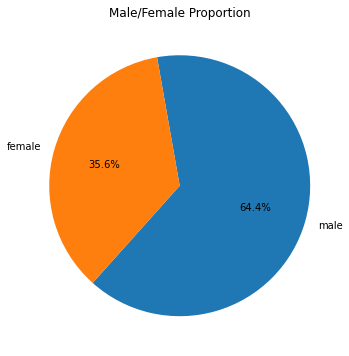

In [44]:
plt.figure(figsize=(12,6))
x = df.sex.value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',startangle=100,counterclock=False)
plt.title('Male/Female Proportion');

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

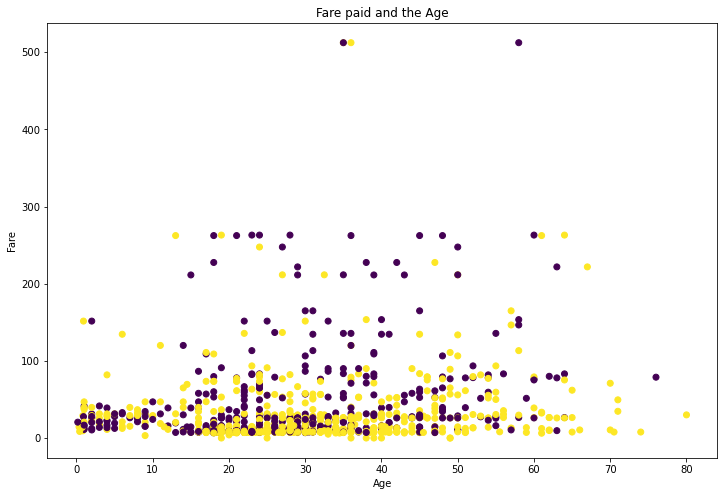

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['age'],y=df['fare'],c=df['sex'].astype('category').cat.codes)
plt.title('Fare paid and the Age')
plt.xlabel('Age')
plt.ylabel('Fare');